In [1]:
import os
import time

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pwd

'/home/soaib/Soaib/Github/YOLOv4-CSP'

In [3]:
names_path = os.path.sep.join(['models/coco.names'])
NAMES = open(names_path).read().strip().split('\n')
NAMES

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [4]:
csp_weights_path = os.path.sep.join(['models/yolov4-csp.weights'])
mish_weights_path = os.path.sep.join(['models/yolov4x-mish.weights'])
config_path = os.path.sep.join(['models/yolov4-csp.cfg'])

In [5]:
csp_net = cv2.dnn.readNet(config_path, csp_weights_path)
mish_net = cv2.dnn.readNet(config_path, mish_weights_path)

In [6]:
np.random.seed(42)
COLORS = np.random.randint(0, 255, size=(len(NAMES), 3), dtype='uint8')


In [7]:
ln_mish = mish_net.getLayerNames()
print('Total Layer (MISH):'+str(len(ln_mish)))
print('Output Layers (MISH):')
print(mish_net.getUnconnectedOutLayers())
ln_mish = [ln_mish[j[0]-1] for j in mish_net.getUnconnectedOutLayers()]
print(ln_mish)

Total Layer (MISH):402
Output Layers (MISH):
[[334]
 [368]
 [402]]
['yolo_144', 'yolo_159', 'yolo_174']


In [8]:
def blob_image(net, image, show_text=True):
    start = time.time()
    blob = cv2.dnn.blobFromImage(image, 1/255, (416, 416), swapRB=True, crop=False)
    net.setInput(blob)
    layerOutputs = net.forward(ln_mish)
    end = time.time()
    
    if show_text:
        print('YOLO took {:.2f} seconds'.format(end-start))
    return net, image, layerOutputs

In [9]:
def detections(detection, _threshold, boxes, confidences, IDclasses):
    scores = detection[5:]
    classID = np.argmax(scores)
    confidence = scores[classID]
    
    if confidence > _threshold:
        box = detection[0:4] * np.array([W,H,W,H])
        (centerX, centerY, width, height) = box.astype('int')
        
        x = int(centerX - (width/2))
        y = int(centerY - (height/2))
        boxes.append([x,y, int(width), int(height)])
        confidences.append(float(confidence))
        IDClasses.append(classID)
    return boxes, confidences, IDClasses

In [10]:
def image_functions(image, i, confidence, box, COLOES, NAMES, show_text=True):
    (x, y) = (box[i][0], box[i][1])
    (w, h) = (box[i][3], box[i][3])
    
    color = [int(c) for c in COLORS[IDClasses[i]]]
    cv2.rectangle(image, (x,y), (x+w, y+h), color, 2)
    text = '{}: {:.4f}'.format(NAMES[IDClasses[i]], confidence[i])
    
    if show_text:
        print(text)
        print(x,y,w,h)
    cv2.putText(image, text, (x, y-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
    
    return image, x,y,w,h

In [11]:
video = 'input/traffic.mp4'
cap = cv2.VideoCapture(video)
ret, video = cap.read()

In [12]:
ret

True

In [13]:
video.shape

(720, 1274, 3)

In [14]:
video_width = video.shape[1]
video_height = video.shape[0]
video_width, video_height

(1274, 720)

In [15]:
def resizing_video(width, height, max_width=600):
    if width > max_width:
        proportion = width/height
        video_width = max_width
        video_height = int(video_width/proportion)
    
    else:
        video_width = width
        video_height = height
        
    return video_width, video_height

In [16]:
threshold = 0.8
threshold_NMS = 0.5
small_font, medium_font = 0.4, 0.6
font = cv2.FONT_HERSHEY_SIMPLEX

In [17]:
samples_show = 20
current_sample = 0

In [18]:
file_name = 'output/res_traffic.mp4'
fourcc = cv2.VideoWriter_fourcc(*'MP4V')
fps = 30
video_output = cv2.VideoWriter(file_name, fourcc, fps, (video_width, video_height))

YOLO took 0.71 seconds
YOLO took 0.46 seconds
YOLO took 0.37 seconds
YOLO took 0.41 seconds
YOLO took 0.42 seconds
YOLO took 0.44 seconds
YOLO took 0.37 seconds
YOLO took 0.37 seconds
YOLO took 0.36 seconds
YOLO took 0.36 seconds
YOLO took 0.37 seconds
YOLO took 0.37 seconds
YOLO took 0.37 seconds
YOLO took 0.38 seconds
YOLO took 0.36 seconds
YOLO took 0.37 seconds
YOLO took 0.36 seconds
YOLO took 0.37 seconds
YOLO took 0.37 seconds
YOLO took 0.37 seconds
YOLO took 0.37 seconds
YOLO took 0.37 seconds
YOLO took 0.37 seconds
YOLO took 0.37 seconds
YOLO took 0.37 seconds
YOLO took 0.37 seconds
YOLO took 0.36 seconds
YOLO took 0.36 seconds
YOLO took 0.37 seconds
YOLO took 0.36 seconds
YOLO took 0.37 seconds
YOLO took 0.36 seconds
YOLO took 0.37 seconds
YOLO took 0.36 seconds
YOLO took 0.36 seconds
YOLO took 0.36 seconds
YOLO took 0.36 seconds
YOLO took 0.35 seconds
YOLO took 0.36 seconds
YOLO took 0.36 seconds
YOLO took 0.36 seconds
YOLO took 0.40 seconds
YOLO took 0.45 seconds
YOLO took 0

YOLO took 0.45 seconds
YOLO took 0.45 seconds
YOLO took 0.44 seconds
YOLO took 0.45 seconds
YOLO took 0.45 seconds
YOLO took 0.47 seconds
YOLO took 0.45 seconds
YOLO took 0.45 seconds
YOLO took 0.44 seconds
YOLO took 0.44 seconds
YOLO took 0.43 seconds
YOLO took 0.43 seconds
YOLO took 0.44 seconds
YOLO took 0.45 seconds
YOLO took 0.44 seconds
YOLO took 0.44 seconds
YOLO took 0.45 seconds
YOLO took 0.46 seconds
YOLO took 0.45 seconds
YOLO took 0.46 seconds
YOLO took 0.56 seconds
YOLO took 0.46 seconds
YOLO took 0.45 seconds
YOLO took 0.45 seconds
YOLO took 0.49 seconds
YOLO took 0.45 seconds
YOLO took 0.44 seconds
YOLO took 0.46 seconds
YOLO took 0.45 seconds
YOLO took 0.45 seconds
YOLO took 0.45 seconds
YOLO took 0.46 seconds
YOLO took 0.46 seconds
YOLO took 0.47 seconds
YOLO took 0.46 seconds
YOLO took 0.45 seconds
YOLO took 0.45 seconds
YOLO took 0.46 seconds
YOLO took 0.46 seconds
YOLO took 0.45 seconds
YOLO took 0.45 seconds
YOLO took 0.44 seconds
YOLO took 0.46 seconds
YOLO took 0

YOLO took 0.46 seconds
YOLO took 0.45 seconds
YOLO took 0.44 seconds
YOLO took 0.44 seconds
YOLO took 0.44 seconds
YOLO took 0.46 seconds
YOLO took 0.45 seconds
YOLO took 0.45 seconds
YOLO took 0.45 seconds
YOLO took 0.45 seconds
YOLO took 0.45 seconds
YOLO took 0.45 seconds
YOLO took 0.45 seconds
YOLO took 0.45 seconds
YOLO took 0.45 seconds
YOLO took 0.45 seconds
YOLO took 0.45 seconds
YOLO took 0.44 seconds
YOLO took 0.44 seconds
YOLO took 0.45 seconds
YOLO took 0.46 seconds
YOLO took 0.46 seconds
YOLO took 0.45 seconds
YOLO took 0.45 seconds
YOLO took 0.45 seconds
YOLO took 0.44 seconds
YOLO took 0.46 seconds
YOLO took 0.45 seconds
YOLO took 0.45 seconds
YOLO took 0.44 seconds
YOLO took 0.45 seconds
YOLO took 0.44 seconds
YOLO took 0.45 seconds
YOLO took 0.45 seconds
YOLO took 0.45 seconds
YOLO took 0.44 seconds
YOLO took 0.46 seconds
YOLO took 0.45 seconds
YOLO took 0.44 seconds
YOLO took 0.44 seconds
YOLO took 0.45 seconds
YOLO took 0.45 seconds
YOLO took 0.45 seconds
YOLO took 0

YOLO took 0.44 seconds
YOLO took 0.44 seconds
YOLO took 0.44 seconds
YOLO took 0.46 seconds
YOLO took 0.44 seconds
YOLO took 0.45 seconds
YOLO took 0.47 seconds
YOLO took 0.46 seconds
YOLO took 0.45 seconds
YOLO took 0.48 seconds
YOLO took 0.48 seconds
YOLO took 0.60 seconds
YOLO took 0.53 seconds
YOLO took 0.46 seconds
YOLO took 0.55 seconds
YOLO took 0.48 seconds
YOLO took 0.43 seconds
YOLO took 0.53 seconds
YOLO took 0.70 seconds
YOLO took 0.78 seconds
YOLO took 0.74 seconds
YOLO took 0.76 seconds
YOLO took 0.80 seconds
YOLO took 0.79 seconds
YOLO took 0.60 seconds
YOLO took 0.45 seconds
YOLO took 0.46 seconds
YOLO took 0.45 seconds
YOLO took 0.43 seconds
YOLO took 0.46 seconds
YOLO took 0.46 seconds
YOLO took 0.48 seconds
YOLO took 0.51 seconds
YOLO took 0.43 seconds
YOLO took 0.47 seconds
YOLO took 0.88 seconds
YOLO took 0.79 seconds
YOLO took 0.83 seconds
YOLO took 0.97 seconds
YOLO took 0.73 seconds
YOLO took 0.65 seconds
YOLO took 0.69 seconds
YOLO took 0.55 seconds
YOLO took 0

YOLO took 0.52 seconds
YOLO took 0.53 seconds
YOLO took 0.54 seconds
YOLO took 0.54 seconds
YOLO took 0.52 seconds
YOLO took 0.53 seconds
YOLO took 0.52 seconds
YOLO took 0.52 seconds
YOLO took 0.54 seconds
YOLO took 0.52 seconds
YOLO took 0.55 seconds
YOLO took 0.51 seconds
YOLO took 0.53 seconds
YOLO took 0.53 seconds
YOLO took 0.52 seconds
YOLO took 0.61 seconds
YOLO took 0.53 seconds
YOLO took 0.52 seconds
YOLO took 0.56 seconds
YOLO took 0.70 seconds
YOLO took 0.67 seconds
YOLO took 0.62 seconds
YOLO took 0.54 seconds
YOLO took 0.53 seconds
YOLO took 0.52 seconds
YOLO took 0.52 seconds
YOLO took 0.56 seconds
YOLO took 0.53 seconds
YOLO took 0.51 seconds
YOLO took 0.52 seconds
YOLO took 0.54 seconds
YOLO took 0.53 seconds
YOLO took 0.53 seconds
YOLO took 0.51 seconds
YOLO took 0.52 seconds
YOLO took 0.51 seconds
YOLO took 0.53 seconds
YOLO took 0.53 seconds
YOLO took 0.52 seconds
YOLO took 0.52 seconds
YOLO took 0.54 seconds
YOLO took 0.54 seconds
YOLO took 0.53 seconds
YOLO took 0

YOLO took 0.52 seconds
YOLO took 0.53 seconds
YOLO took 0.50 seconds
YOLO took 0.52 seconds
YOLO took 0.50 seconds
YOLO took 0.50 seconds
YOLO took 0.52 seconds
YOLO took 0.51 seconds
YOLO took 0.51 seconds
YOLO took 0.51 seconds
YOLO took 0.51 seconds
YOLO took 0.53 seconds
YOLO took 0.51 seconds
YOLO took 0.52 seconds
YOLO took 0.53 seconds
YOLO took 0.51 seconds
YOLO took 0.52 seconds
YOLO took 0.50 seconds
YOLO took 0.51 seconds
YOLO took 0.51 seconds
YOLO took 0.51 seconds
YOLO took 0.53 seconds
YOLO took 0.49 seconds
YOLO took 0.54 seconds
YOLO took 0.64 seconds
YOLO took 0.62 seconds
YOLO took 0.55 seconds
YOLO took 0.55 seconds
YOLO took 0.64 seconds
YOLO took 0.61 seconds
YOLO took 0.57 seconds
YOLO took 0.52 seconds
YOLO took 0.52 seconds
YOLO took 0.51 seconds
YOLO took 0.53 seconds
YOLO took 0.54 seconds
YOLO took 0.51 seconds
YOLO took 0.51 seconds
YOLO took 0.52 seconds
YOLO took 0.55 seconds
YOLO took 0.51 seconds
YOLO took 0.51 seconds
YOLO took 0.51 seconds
YOLO took 0

YOLO took 0.50 seconds
YOLO took 0.51 seconds
YOLO took 0.53 seconds
YOLO took 0.52 seconds
YOLO took 0.55 seconds
YOLO took 0.51 seconds
YOLO took 0.54 seconds
YOLO took 0.52 seconds
YOLO took 0.54 seconds
YOLO took 0.52 seconds
YOLO took 0.51 seconds
YOLO took 0.54 seconds
YOLO took 0.55 seconds
YOLO took 0.52 seconds
YOLO took 0.52 seconds
YOLO took 0.53 seconds
YOLO took 0.50 seconds
YOLO took 0.53 seconds
YOLO took 0.52 seconds
YOLO took 0.52 seconds
YOLO took 0.53 seconds
YOLO took 0.52 seconds
YOLO took 0.51 seconds
YOLO took 0.52 seconds
YOLO took 0.51 seconds
YOLO took 0.52 seconds
YOLO took 0.51 seconds
YOLO took 0.51 seconds
YOLO took 0.52 seconds
YOLO took 0.52 seconds
YOLO took 0.51 seconds
YOLO took 0.51 seconds
YOLO took 0.53 seconds
YOLO took 0.50 seconds
YOLO took 0.50 seconds
YOLO took 0.51 seconds
YOLO took 0.51 seconds
YOLO took 0.52 seconds
YOLO took 0.53 seconds
YOLO took 0.52 seconds
YOLO took 0.50 seconds
YOLO took 0.53 seconds
YOLO took 0.51 seconds
YOLO took 0

YOLO took 0.54 seconds
YOLO took 0.55 seconds
YOLO took 0.53 seconds
YOLO took 0.55 seconds
YOLO took 0.53 seconds
YOLO took 0.53 seconds
YOLO took 0.53 seconds
YOLO took 0.54 seconds
YOLO took 0.55 seconds
YOLO took 0.56 seconds
YOLO took 0.52 seconds
YOLO took 0.54 seconds
YOLO took 0.52 seconds
YOLO took 0.53 seconds
YOLO took 0.54 seconds
YOLO took 0.52 seconds
YOLO took 0.54 seconds
YOLO took 0.52 seconds
YOLO took 0.54 seconds
YOLO took 0.54 seconds
YOLO took 0.56 seconds
YOLO took 0.52 seconds
YOLO took 0.53 seconds
YOLO took 0.53 seconds
YOLO took 0.54 seconds
YOLO took 0.52 seconds
YOLO took 0.54 seconds
YOLO took 0.54 seconds
YOLO took 0.52 seconds
YOLO took 0.54 seconds
YOLO took 0.55 seconds
YOLO took 0.53 seconds
YOLO took 0.54 seconds
YOLO took 0.54 seconds
YOLO took 0.52 seconds
YOLO took 0.53 seconds
YOLO took 0.53 seconds
YOLO took 0.57 seconds
YOLO took 0.53 seconds
YOLO took 0.54 seconds
YOLO took 0.54 seconds
YOLO took 0.54 seconds
YOLO took 0.53 seconds
YOLO took 0

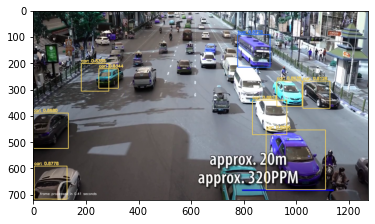

In [19]:
while(cv2.waitKey(1) < 0):
    ret, frame = cap.read()
    if not ret:
        break
    t = time.time()
    frame = cv2.resize(frame, (video_width, video_height))
    
    try:
        (H,W) = frame.shape[:2]
    except:
        print('Error')
        continue
    
    image_cp = frame.copy()
    net, frame, layerOutputs = blob_image(csp_net, frame)
    boxes = []
    confidences = []
    IDClasses = []
    
    for output in layerOutputs:
        for detection in output:
            boxes, confidences, IDClasses = detections(detection, threshold, boxes, confidences, IDClasses)
        
    objs = cv2.dnn.NMSBoxes(boxes, confidences, threshold, threshold_NMS)
    
    if len(objs) > 0:
        for i in objs.flatten():
            frame, x, y, w, h = image_functions(frame, i, confidences, boxes, COLORS, NAMES, show_text=False)
            object_ = image_cp[y:y+h, x:x+w]
    
    cv2.putText(frame, ' frame processed in {:.2f} seconds'.format(time.time()-t), (20, video_height-20),
               font, small_font, (250, 250, 250), 0, lineType=cv2.LINE_AA)
    
    
    if current_sample <= samples_show:
        plt.imshow(frame)
        current_sample += 1

    video_output.write(frame)

print('Finished')
video_output.release()
cv2.destroyAllWindows()